In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import os
os.listdir('../data/')

['TSLA_news.csv', 'reddit_wsb.csv', 'TSLA.csv']

In [6]:
#Importing the data
reddit_data = pd.read_csv('../data/reddit_wsb.csv')

In [50]:
#Checking the first 5 rows of the data
reddit_data.head()


,title,score,id,subreddit,url,num_comments,body,created,comments,body_sentiment_score,stock
0,"Daily Discussion Thread for July 2, 2024",91,1dticah,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,9013,[View Post](https://sh.reddit.com/r/wallstreet...,2024-07-02,['Last time TSLA missed deliveries and fucked ...,0.0,Other
1,Most Anticipated Earnings Releases for the wee...,117,1dq0mv7,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,523,&#x200B;\n\nhttps://preview.redd.it/twegncch76...,2024-06-27,['i think i’m better off selling what money is...,0.0,Other
2,Puts on Boeing guys just boarded and saw a loo...,18907,1dtl0tg,wallstreetbets,https://v.redd.it/39im2n9oq3ad1,1355,NaN,2024-07-02,NaN,0.0,Other
3,"Tesla: ""In Q2, we produced approximately 411k ...",1062,1dtlqhh,wallstreetbets,https://x.com/Tesla/status/1808124453575909499,358,NaN,2024-07-02,NaN,0.0,TSLA
4,Teslas r pretty cool $850k gain,714,1dtn081,wallstreetbets,https://i.redd.it/2798xy8x64ad1.jpeg,156,NaN,2024-07-02,NaN,0.0,TSLA


In [51]:
#Get information about the data
reddit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 530 non-null    object 
 1   score                 530 non-null    int64  
 2   id                    530 non-null    object 
 3   subreddit             530 non-null    object 
 4   url                   530 non-null    object 
 5   num_comments          530 non-null    int64  
 6   body                  370 non-null    object 
 7   created               530 non-null    object 
 8   comments              192 non-null    object 
 9   body_sentiment_score  530 non-null    float64
 10  stock                 530 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 45.7+ KB


In [53]:
#cleaning the data and getting the sentiment score
import re
def clean_text(text):
    text = str(text).lower()
    #replace nan values with empty string
    text = text.replace('nan', '')
    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')  
    text=text.replace('\xa0',' ')
    #remove https links
    text = re.sub(r'http\S+', '', text)
    return text
#function to define sentiment from reddit comments
from textblob import TextBlob
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity
reddit_data['body_sentiment_score']=reddit_data.body.apply(clean_text).apply(get_sentiment)

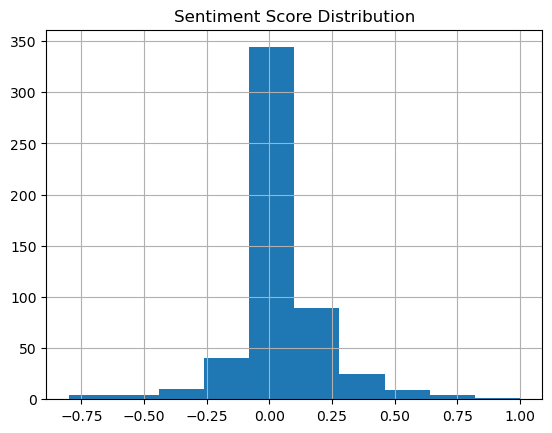

In [54]:
reddit_data['body_sentiment_score'].hist()
plt.title('Sentiment Score Distribution')
plt.show()

In [55]:
#transform column to date without time
reddit_data.created = pd.to_datetime(reddit_data.created).dt.date


In [56]:
#define rows into categories that describe TSLA, AMZN, AAPL stocks  
def get_stock(text):
    if 'tsla' in text or 'tesla' in text:
        return 'TSLA'
    elif 'amzn' in text or 'amazon' in text:
        return 'AMZN'
    elif 'aapl' in text  or 'apple' in text:
        return 'AAPL'
    else:
        return 'Other'
    
#categorize stocks based on the title anbd body of the reddit post. First combine title and body cleaned values and then apply get_stock
reddit_data['stock'] = (reddit_data.title.apply(clean_text)+' '+reddit_data.body.apply(clean_text)).apply(get_stock)


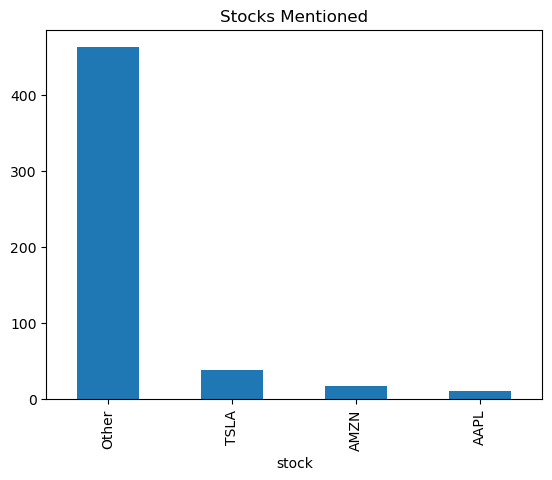

In [58]:
reddit_data['stock'].value_counts().plot(kind='bar')
plt.title('Stocks Mentioned')
plt.show()

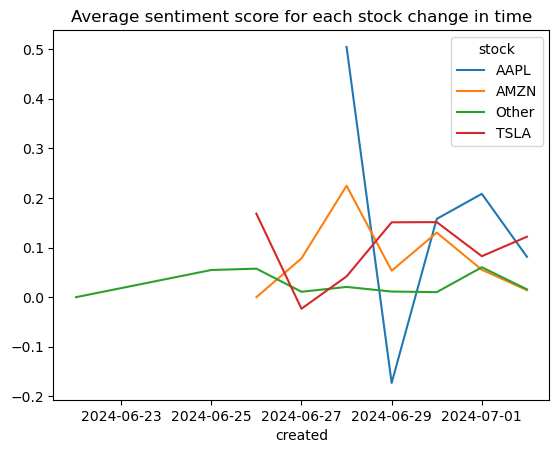

In [59]:
#plot average sentiment score for each stock change in time
reddit_data.groupby(['created', 'stock'])['body_sentiment_score'].mean().unstack().plot()
plt.title('Average sentiment score for each stock change in time')
plt.show()